In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import scipy.io

## 1. Implement PCA (40 points)

In [2]:
def PCA(A, num_dimension):
    # N: # of features, M: # data
    N , M = A.shape 
    # Step 1: compute sample mean
    mean_x = np.mean(A, axis=0)
    
    # Step 2: subtract sample mean (i.e., center data at zero)
    center_A = A - mean_x
    
    # Step 3: compute the sample covariance matrix Σx
    cov_A = (center_A @ center_A.T)/M
    
    # Step 4: compute the SVD of Σx
    u, s, vh = np.linalg.svd(cov_A, full_matrices=True)
    
    # Step 5: dimensionality reduction step
    reduced_u = u[:,:num_dimension]
    reduced_A = reduced_u.T @ center_A
    
    # Step 6: transfer features to columns, shape = (# data, # of features)
    res = np.zeros(shape = (reduced_A.shape[1], reduced_A.shape[0]))
    for col in range(reduced_A.shape[1]):
        res[col,:] = reduced_A[:, col]
                   
    
    return res

## 2. load data.mat file and reduce dimensionality of x to 2 dimensions  (30 points)


In [3]:
# Loading data, mat is a dictionary
mat = scipy.io.loadmat('data.mat')

In [4]:
x = mat['x']
y = mat['y']

In [5]:
# Check the shape of data
x.shape

(567, 1000)

In [6]:
x

array([[-0.1810047 , -0.3263064 ,  0.09900231, ...,  0.0896374 ,
         0.30170187, -0.315777  ],
       [-0.08604874, -0.24425426,  0.03491393, ...,  0.15105137,
         0.14930305, -0.50344443],
       [-0.02536274, -0.22994491,  0.0929625 , ...,  0.21274611,
         0.08147568, -0.5320467 ],
       ...,
       [ 0.39470038, -0.10732589,  0.3864684 , ..., -0.2229541 ,
        -0.34983388,  0.11745162],
       [ 0.50167596, -0.11745649,  0.12389403, ..., -0.15082702,
        -0.21521473,  0.29589456],
       [ 0.6502385 , -0.31726012,  0.02721648, ..., -0.1947323 ,
        -0.09403939, -0.24161373]], dtype=float32)

In [7]:
y.shape

(567, 1)

In [8]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

We have 567 rows of data with 1000 attributes

In [9]:
# Transfer x with shape (# of featurs, # raws of data)
x_tr = np.zeros(shape=(x.shape[1],x.shape[0]))
for i in range(len(x)):
    x_tr[:,i] = x[i]        

In [10]:
x_tr.shape

(1000, 567)

In [11]:
x_tr

array([[-0.1810047 , -0.08604874, -0.02536274, ...,  0.39470038,
         0.50167596,  0.65023851],
       [-0.3263064 , -0.24425426, -0.22994491, ..., -0.10732589,
        -0.11745649, -0.31726012],
       [ 0.09900231,  0.03491393,  0.0929625 , ...,  0.38646841,
         0.12389403,  0.02721648],
       ...,
       [ 0.0896374 ,  0.15105137,  0.21274611, ..., -0.22295409,
        -0.15082702, -0.19473229],
       [ 0.30170187,  0.14930305,  0.08147568, ..., -0.34983388,
        -0.21521473, -0.09403939],
       [-0.315777  , -0.50344443, -0.53204668, ...,  0.11745162,
         0.29589456, -0.24161373]])

In [12]:
# Extract the first two features
reduced_x = PCA(x_tr, 2)

In [13]:
print(reduced_x,'\n')
print(reduced_x.shape)

[[ -5.15142682  -6.12999886]
 [ -3.78029197  -5.21845541]
 [ -4.00542476  -5.01741098]
 ...
 [-17.852712     6.99751992]
 [-20.83954134   6.81205359]
 [-18.41354697   5.44942843]] 

(567, 2)


## 3. Plot the reduced 2 dimensions and show the color based on y  (10 points)

In [14]:
# Concatenate features and labels into a data frame
df = pd.DataFrame({'x1':reduced_x[:,0],'x2':reduced_x[:,1],'y':y.flatten()})

In [15]:
df

,x1,x2,y
0,-5.151427,-6.129999,1
1,-3.780292,-5.218455,1
2,-4.005425,-5.017411,1
3,-5.688259,-6.597701,1
4,-3.889177,-4.460824,1
...,...,...,...
562,-20.556554,4.577341,6
563,-19.425751,6.225429,6
564,-17.852712,6.997520,6
565,-20.839541,6.812054,6


Text(0, 0.5, 'PCA2')

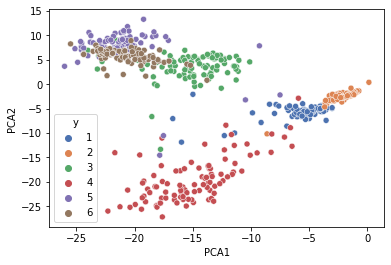

In [16]:
# Plot the data with reduced features
sns.scatterplot(data = df, x= 'x1', y = 'x2', hue = 'y', palette="deep")
plt.xlabel('PCA1')
plt.ylabel('PCA2')

* Ref: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## 4. Compare the results with the t-SNE view from sklearn  (10 points)

In [17]:
n_components = 2
tsne = TSNE(n_components,random_state= 0, perplexity = 50)
tsne_result = tsne.fit_transform(x)
tsne_result.shape

(567, 2)

In [18]:
df_tSNE = pd.DataFrame({'x1':tsne_result[:,0],'x2':tsne_result[:,1],'y':y.flatten()})

In [19]:
df_tSNE

,x1,x2,y
0,7.012084,17.474298,1
1,5.594325,16.003817,1
2,5.945087,16.360861,1
3,7.166727,18.818567,1
4,4.793349,16.438816,1
...,...,...,...
562,3.328513,-22.345848,6
563,4.164556,-23.866270,6
564,4.100992,-23.542871,6
565,3.929608,-24.597866,6


Text(0, 0.5, 'PCA2')

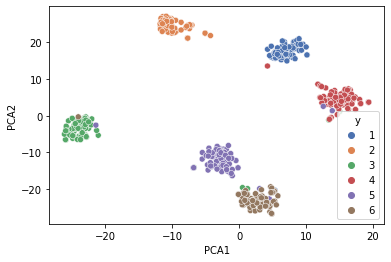

In [20]:
sns.scatterplot(data = df_tSNE, x= 'x1', y = 'x2', hue = 'y', palette="deep")
plt.xlabel('PCA1')
plt.ylabel('PCA2')

* Ref: https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/

When applying t-SNE to reduce the number of dimensions, it becomes easier to categorize between different classes. The distances between the same group decreased.

## 5. Explain the differences and why (10 points)

The main difference between the two methods is PCA utilizes the covariance matrix, preserving the global structure of data, on the hand, t-SNE works by minimizing the distance between the point in a gaussian, preserving the local structure of data. Therefore, we can see more compacted groups compared to PCA method. Other differences are t-SNE includes several hyperparameters, however, PCA does not and PCA is linear dimensionality reduction and t-SNE is non-linear.

* Ref: https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/